In [159]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [160]:
#RateBeer and Beer Advocate matched website data :

df_beer = pd.read_csv("matched_beer_data/beers.csv", header=1)
df_breweries  = pd.read_csv("matched_beer_data/breweries.csv", header=1)
df_users = pd.read_csv("matched_beer_data/users.csv", header=1)
df_rating = pd.read_csv("matched_beer_data/ratings.csv", header=1)
df_users_approx = pd.read_csv("matched_beer_data/users_approx.csv", header=1)

#Display all columns
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')


### Data preprocessing:

**IMPORTING NEW DATASET ABOUT THE LOCATIONS'SUPERFICIES AND CLEANING THEM**

In [161]:
import requests
from bs4 import BeautifulSoup

In [162]:
#wikipedia dataset for states (US) superficies
wiki_url_4usa = 'https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_area'
#Get the html of the pages
response_us = requests.get(wiki_url_4usa)
soup_us = BeautifulSoup(response_us.text,'lxml')

#Find the useful table from in the html and convert it into pandas df 
superficies_list_us = soup_us.find('table', attrs={'class':"wikitable"})
df_superficies_us = pd.read_html(str(superficies_list_us), header=1)[0]
display(df_superficies_us.columns)

#Clean the datafram
df_superficies_us = df_superficies_us[['State', 'km2']] #Keep only the columns we need
df_superficies_us['State'] = 'United States, ' + df_superficies_us['State'] #add the country name to be consistent with the other dataset
df_superficies_us = df_superficies_us.rename(columns={'State': 'location'}) #rename the column
df_superficies_us = df_superficies_us[:-3] #remove the last 3 rows (not states)
df_superficies_us['km2'] = df_superficies_us['km2'].astype(float) #convert the km2 column to int


#_______________________________________________________________________________________________________________________

#wikipedia dataset for country superficies
wiki_url = 'https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_area'

#Get the html of the pages
response = requests.get(wiki_url)
soup = BeautifulSoup(response.text,'lxml')

#Find the useful table from in the html and convert it into pandas df 
superficies_list = soup.find('table',attrs={'class':"wikitable"})
df_superficies = pd.read_html(str(superficies_list))[0]
display(df_superficies.columns)


#Keep only the columns we need and clean them
df_superficies = df_superficies[['Country / dependency', 'Total in km2 (mi2)']]
df_superficies['Total in km2 (mi2)'] = df_superficies['Total in km2 (mi2)'].str.replace(',', '') #remove the comma
df_superficies['Total in km2 (mi2)'] = df_superficies['Total in km2 (mi2)'].str.split(' ').str[0]  #remove the text in parenthesis (mi2)
df_superficies.rename(columns={'Country / dependency':'location', 'Total in km2 (mi2)':'km2'}, inplace=True) #rename the columns
df_superficies['location'] = df_superficies['location'].str.replace(r'\s*\([^)]*\)', '', regex=True)  #Remove all parenthesis and text inside in the location (ex : remove (China) in 'Hong Kong (China)')
df_superficies['km2'] = df_superficies['km2'].astype(float) #convert the km2 column to int

#Change the name of the country to be consistent with the other dataset
df_superficies[df_superficies['location'] == 'Slovakia'].location = 'Slovak Republic'
df_superficies[df_superficies['location'] == 'North Macedonia'].location = 'Macedonia'
df_superficies[df_superficies['location'] == 'Trinidad and Tobago'].location = 'Trinidad & Tobago'


#________________________________________________________________

#Dataset for UK coutries superficies to be consistent with the other dataset (breweries and beers)
df_superficies_uk = pd.DataFrame({'location': ['England', 'Scotland', 'Wales', 'Northern Ireland'], 
                                  'km2': [130279, 78772, 20779, 14130]}) #create the dataframe (small so easy to do it manually)

#_______________________________________________________________________________________________________________________

#Concatenate the two first dataframe 
df_superficies_temp = pd.concat([df_superficies, df_superficies_us]) #concatenate the two dataframe
print(np.shape(df_superficies_temp))

#Merging the dataframes with the UK dataframe
df_superficies_tot = pd.concat([df_superficies_temp, df_superficies_uk])
print(np.shape(df_superficies_tot))

C:\Users\nicol\AppData\Local\Temp\ipykernel_19876\958412496.py:9: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_superficies_us = pd.read_html(str(superficies_list_us), header=1)[0]


Index(['State', 'Rank', 'sq mi', 'km2', 'Rank.1', 'sq mi.1', 'km2.1', '% land',
       'Rank.2', 'sq mi.2', 'km2.2', '% water'],
      dtype='object')

C:\Users\nicol\AppData\Local\Temp\ipykernel_19876\958412496.py:31: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_superficies = pd.read_html(str(superficies_list))[0]


Index(['Unnamed: 0', 'Country / dependency', 'Total in km2 (mi2)',
       'Land in km2 (mi2)', 'Water in km2 (mi2)', '% water', 'Unnamed: 6'],
      dtype='object')

(323, 2)
(327, 2)


C:\Users\nicol\AppData\Local\Temp\ipykernel_19876\958412496.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_superficies[df_superficies['location'] == 'Slovakia'].location = 'Slovak Republic'
C:\Users\nicol\AppData\Local\Temp\ipykernel_19876\958412496.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_superficies[df_superficies['location'] == 'North Macedonia'].location = 'Macedonia'
C:\Users\nicol\AppData\Local\Temp\ipykernel_19876\958412496.py:46: SettingWithCopyWarning: 
A value is trying to 

**MERGING AND CLEANING THE MATCHED DATASETS (BEERS AND BREWERIES)**

In [163]:
#Merge the two dataframes on the brewery_id column with respect to the beers to have access to the location of every beer
df_beer_breweries = pd.merge(df_beer, df_breweries, left_on='brewery_id', right_on='id', how='left')


In [166]:
#Clean the dataframe by dropping the columns that are not useful for the analysis
df_beer_breweries_clean = df_beer_breweries.drop(['beer_wout_brewery_name', 'beer_wout_brewery_name.1', 'style','abv.1', 'id', 'id.1', 'name', 'name.1', 'beer_name.1', 'brewery_name.1', 'location.1', 'nbr_beers.1'], axis=1)


#Choose to keep style from RateBeer and drop the style from Beer Advocate (the style from Beer Advocate is too precise)
df_beer_breweries_clean.rename(columns={'style.1':'style'}, inplace=True)



**MERGING AND CLEANING THE MATCHED DATASETS (SUPERFICIES AND BREWERIES)**

In [ ]:
#Merge the dataframe with the superficies dataframe to have access to the superficies of every beer
df_breweries_superficies = pd.merge(df_breweries, df_superficies_tot, on='location', how='left')
df_breweries_superficies


#Drop row with NaN values in km2 column
df_breweries_superficies = df_breweries_superficies.dropna(subset=['km2'])
print(df_breweries_superficies.shape)

#Drop the location with less than 5 breweries (to do a beer trip, we need to have different breweries to visit!)
df_breweries_superficies_flt = df_breweries_superficies.groupby('location').filter(lambda x: len(x) >= 5)
print(df_breweries_superficies_flt.shape)

(8511, 11)
(8350, 11)


**CLEANING THE DATASET ABOUT USERS**

In [ ]:
#Selection of the columns to keep and rename them
df_users_approx_flt = df_users_approx[['location', 'user_id', 'user_name', 'nbr_ratings', 'nbr_ratings.1']]
df_users_approx_flt = df_users_approx_flt.rename(columns={'nbr_ratings':'nbr_ratings_beer_advocate', 'nbr_ratings.1':'nbr_ratings_ratebeer'})


#Check that every user has at least one rating in each website (insure that the user is active)
df_users_approx_flt = df_users_approx_flt.drop(df_users_approx_flt[(df_users_approx_flt['nbr_ratings_beer_advocate'] == 0) | (df_users_approx_flt['nbr_ratings_ratebeer'] == 0)].index)  # Drop rows where there is no ratings in one of the two websites


,location,user_id,user_name,nbr_ratings_beer_advocate,nbr_ratings_ratebeer
0,Spain,magicuenca.1185749,MAGICuenca,3,89
1,Germany,erzengel.248045,Erzengel,6,8781
2,"United States, Virginia",gendv138.695700,GenDV138,1,6240
3,"United States, Washington",nimbleprop.208928,nimbleprop,3,7452
4,Estonia,visionthing.639993,visionthing,11,5462
...,...,...,...,...,...
3336,"United States, Michigan",ypsifly.8833,ypsifly,587,1
3337,"United States, Texas",hardtarget.1712,HardTarget,1379,1
3338,"United States, Delaware",deadterry.13629,DeadTerry,1,2
3339,Vietnam,nelsonsaigon.897449,nelsonsaigon,176,1


*ALL OF THE FEATURES USED TO BUILD THE TRIPS*


|Name | Object  | Description   |
| -------- | -------- | -------- |
| *df_beer_breweries_clean* | DataFrame | filtered dataset with both beer and breweries data|
|  abv  | Series - float  | Indicates the beer's alcohol percentage|
|  avg  | Series - float  | Average score given to the beer |
|  avg_computed -float | Series - float  ||
|  avg_matched_valid_ratings | Series - float  ||
|  ba_score  | Series - float  ||
|  beer_id  | Series - int  | Unique ID of each beer|
|  beer_name  | Series - string  | Name of the beer |
|  brewery_id  | Series - int  | Unique ID for each brewery the beers belong to|
|  brewery_name  | Series - string  | Name of the brewery|
|    | Series   ||
|    | Series   ||
|    | Series   ||
|    | Series   ||
|    | Series   ||
|    | Series   ||
|    | Series   ||

### Start to build our different trips :

**BEER TRIPS RELATIVELY TO THE NUMBER OF BREWERIES PER KM2**

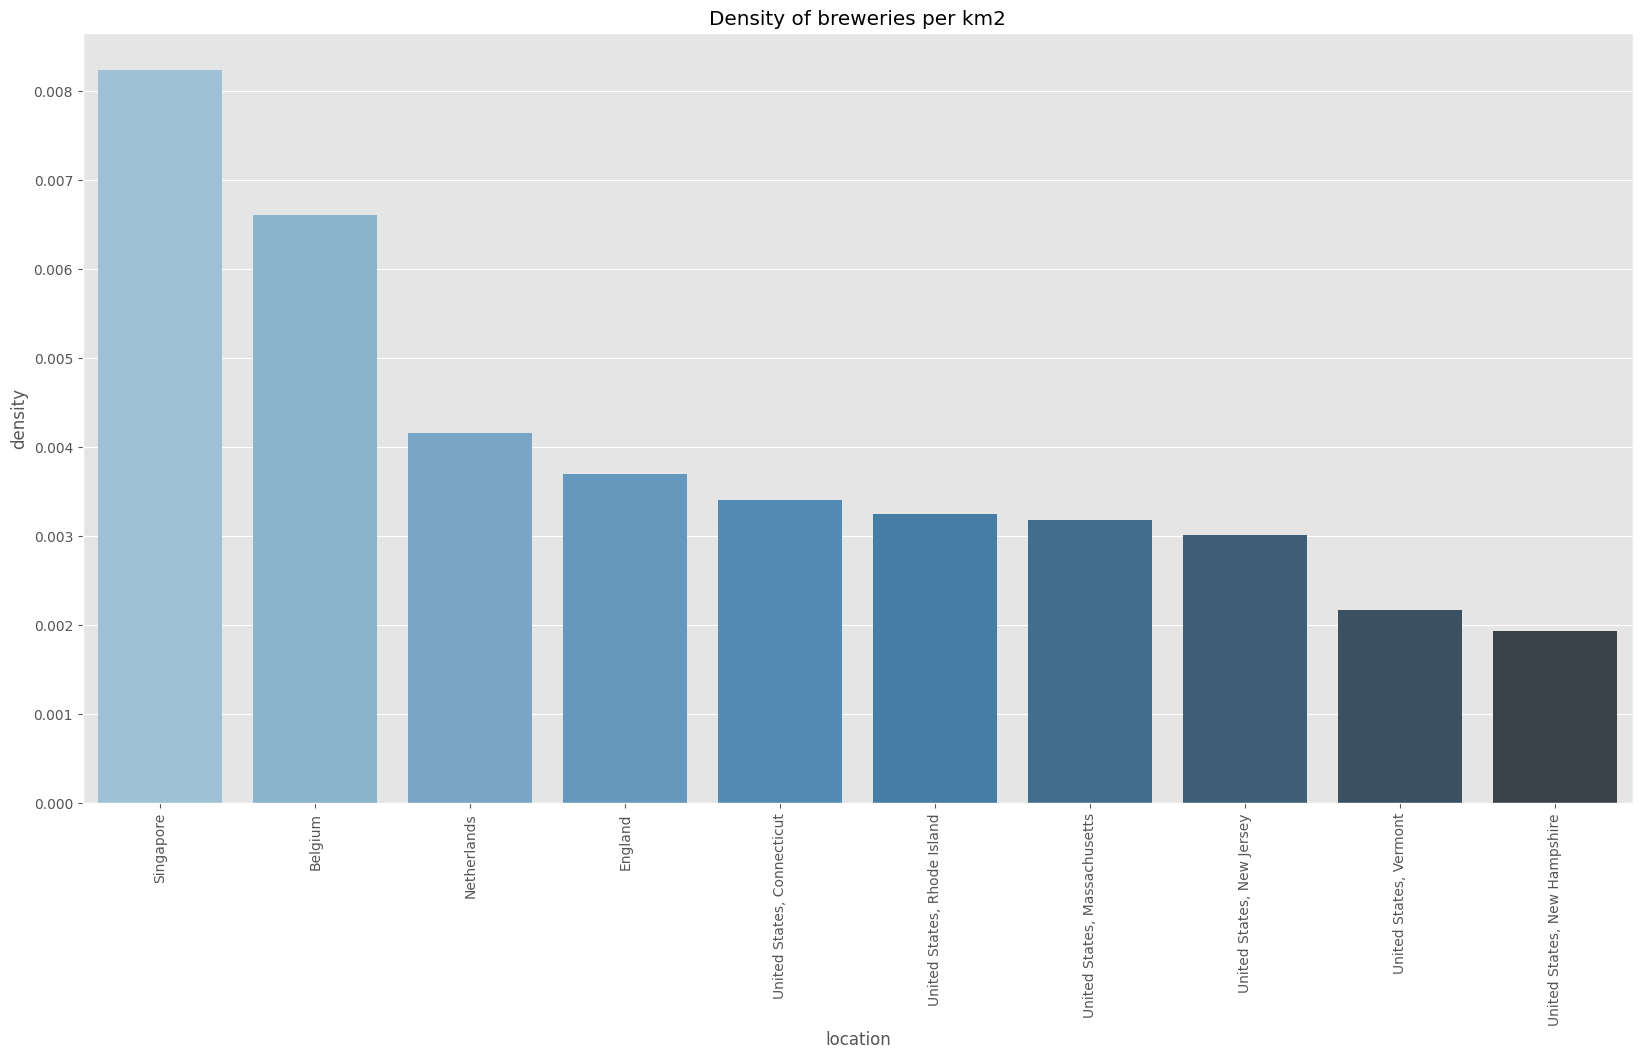

47                        Singapore
3                           Belgium
34                      Netherlands
16                          England
63       United States, Connecticut
95      United States, Rhode Island
77     United States, Massachusetts
86        United States, New Jersey
101          United States, Vermont
85     United States, New Hampshire
Name: location, dtype: object

In [ ]:
#Group the breweries by country, count the number of breweries and divide by the superfices of the location to have a density :
df_breweries_superficies_count = df_breweries_superficies_flt.groupby(['location']).id.count()
df_breweries_superficies_count

#Get the values of the km2 in every location 
df_breweries_superficies_km2 = df_breweries_superficies_flt.groupby(['location']).km2.mean()

df_density = pd.concat([df_breweries_superficies_count, df_breweries_superficies_km2], axis=1)
df_density['density'] = df_density['id'] / df_density['km2']
df_density.reset_index(inplace=True)
df_density.sort_values(by=['density'], ascending=False, inplace=True) 
top_ten_density = df_density.head(10)

#Plot the density of breweries per km2
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.title('Density of breweries per km2')
sns.barplot(x='location', y='density', data=top_ten_density, palette='Blues_d', hue='location')
plt.show()

#Store the location of the top 10 density of breweries per km2
top_ten_density_location = top_ten_density['location']
top_ten_density_location

#NO error bar because we don't have the standard deviation of the density of breweries per km2....



**BEER TRIPS RELATIVELY TO THE PERCENTAGE OF ALCOHOL**

In [ ]:
#Controling the number of null values in the abv column
df_beer_breweries_clean.abv.isnull().sum()

#Drop the location with less than 5 beers (to do a beer trip, we need to have different beer to drink!) and beer with less than 20 ratings
df_beer_breweries_flt_abv = df_beer_breweries_clean.groupby('location').filter(lambda x: (len(x) >= 5) | (x['nbr_ratings'].sum() + x['nbr_ratings.1'].sum() >= 20))
                                                                                                          

#Summary statistics of the abv column per location
df_beer_breweries_flt_abv.groupby('location').abv.describe()


,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
Albania,1.0,4.100000,NaN,4.10,4.100,4.1,4.100,4.1
Argentina,19.0,5.831579,1.696746,4.00,5.000,5.5,6.000,11.0
Australia,711.0,5.727426,1.728223,2.70,4.600,5.2,6.500,14.6
Austria,142.0,5.647606,2.028092,0.38,4.900,5.2,6.300,14.0
Bahamas,6.0,5.133333,1.777264,2.30,4.450,5.4,5.825,7.6
...,...,...,...,...,...,...,...,...
"United States, Wyoming",145.0,6.445172,1.812144,4.00,5.000,6.0,7.500,12.5
Uzbekistan,12.0,4.475000,0.601702,3.40,4.225,4.4,5.000,5.4
Vietnam,19.0,6.536842,2.481982,4.00,4.650,6.5,7.100,14.0


,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
Trinidad & Tobago,8.0,3.525000,1.971765,1.2,1.200,4.45,5.050,5.5
Bosnia and Herzegovina,3.0,3.666667,1.457166,2.0,3.150,4.30,4.500,4.7
Albania,1.0,4.100000,NaN,4.1,4.100,4.10,4.100,4.1
Jersey,5.0,4.100000,0.264575,3.7,4.000,4.20,4.200,4.4
Cuba,2.0,4.250000,0.353553,4.0,4.125,4.25,4.375,4.5
Lebanon,2.0,4.350000,2.333452,2.7,3.525,4.35,5.175,6.0
Malawi,3.0,4.466667,1.078579,3.7,3.850,4.00,4.850,5.7
Uzbekistan,12.0,4.475000,0.601702,3.4,4.225,4.40,5.000,5.4
Isle of Man,4.0,4.650000,1.297433,3.7,3.775,4.20,5.075,6.5


Index(['Trinidad & Tobago', 'Bosnia and Herzegovina', 'Albania', 'Jersey',
       'Cuba', 'Lebanon', 'Malawi', 'Uzbekistan', 'Isle of Man', 'Cyprus'],
      dtype='object', name='location')

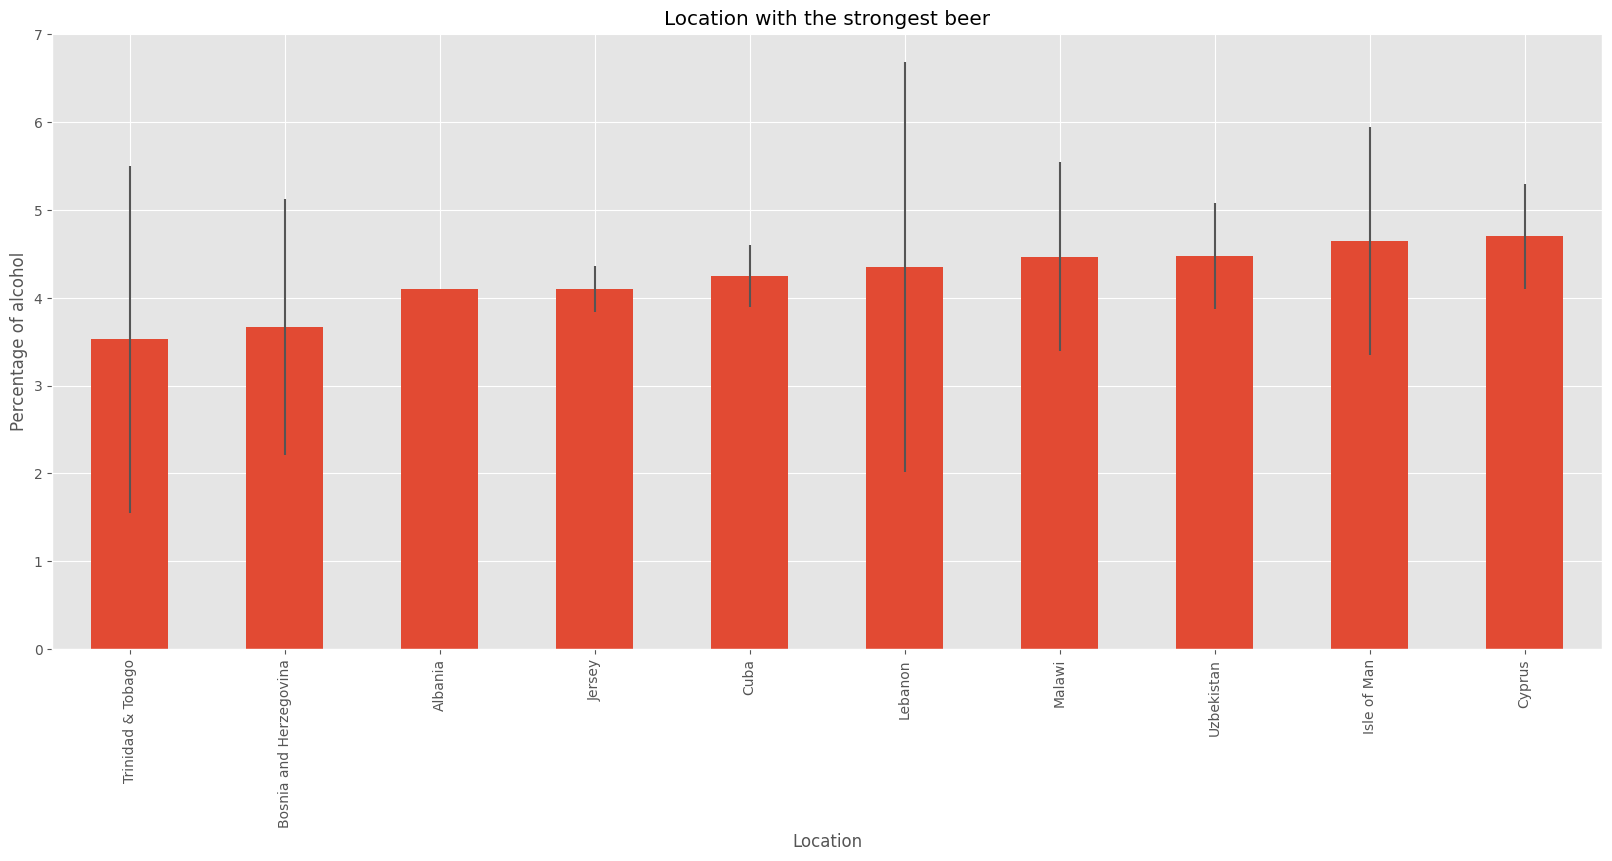

In [ ]:
#Sort the dataframe by considering the 10 location with the softest beer
avg_rating_location = df_beer_breweries_flt_abv.groupby('location').abv.describe()
avg_rating_location.sort_values(by='mean', ascending=True, inplace=True)
top_ten_abv_soft = avg_rating_location.head(10)
display(top_ten_abv_soft)

#Plot the result with standard deviation as error bar
pl = top_ten_abv_soft['mean'].plot(kind='bar', figsize=[20,8], rot=0, yerr=top_ten_abv_soft['std']) #mieux de faire avec CI ?????
pl.set_title('Location with the strongest beer')
pl.set_ylabel('Percentage of alcohol')
pl.set_xlabel('Location')
pl.set_xticklabels(top_ten_abv_soft.index, rotation=90)


#Keep a copy the ranking 
top_ten_abv_only_location = top_ten_abv_soft.index 
top_ten_abv_only_location

,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
Egypt,4.0,7.675000,2.736634,4.7,5.675,8.00,10.000,10.0
Estonia,69.0,7.482609,2.704080,3.8,5.500,6.90,8.900,16.0
Belgium,863.0,7.115435,2.328768,0.5,6.000,7.00,8.000,39.0
Iceland,45.0,7.108889,2.644619,4.0,5.200,6.00,9.000,14.5
"United States, Rhode Island",143.0,7.013566,2.198081,2.5,5.500,6.60,8.000,12.5
Netherlands,569.0,7.005290,2.022058,0.5,5.600,6.60,8.200,20.0
"United States, Oklahoma",90.0,6.880000,2.655933,3.7,5.075,6.25,8.000,17.0
"United States, Georgia",461.0,6.852278,1.906642,3.0,5.300,6.50,8.100,13.9
Mauritius,12.0,6.825000,2.100271,4.8,5.600,6.20,7.375,12.0


Index(['Egypt', 'Estonia', 'Belgium', 'Iceland', 'United States, Rhode Island',
       'Netherlands', 'United States, Oklahoma', 'United States, Georgia',
       'Mauritius', 'United States, California'],
      dtype='object', name='location')

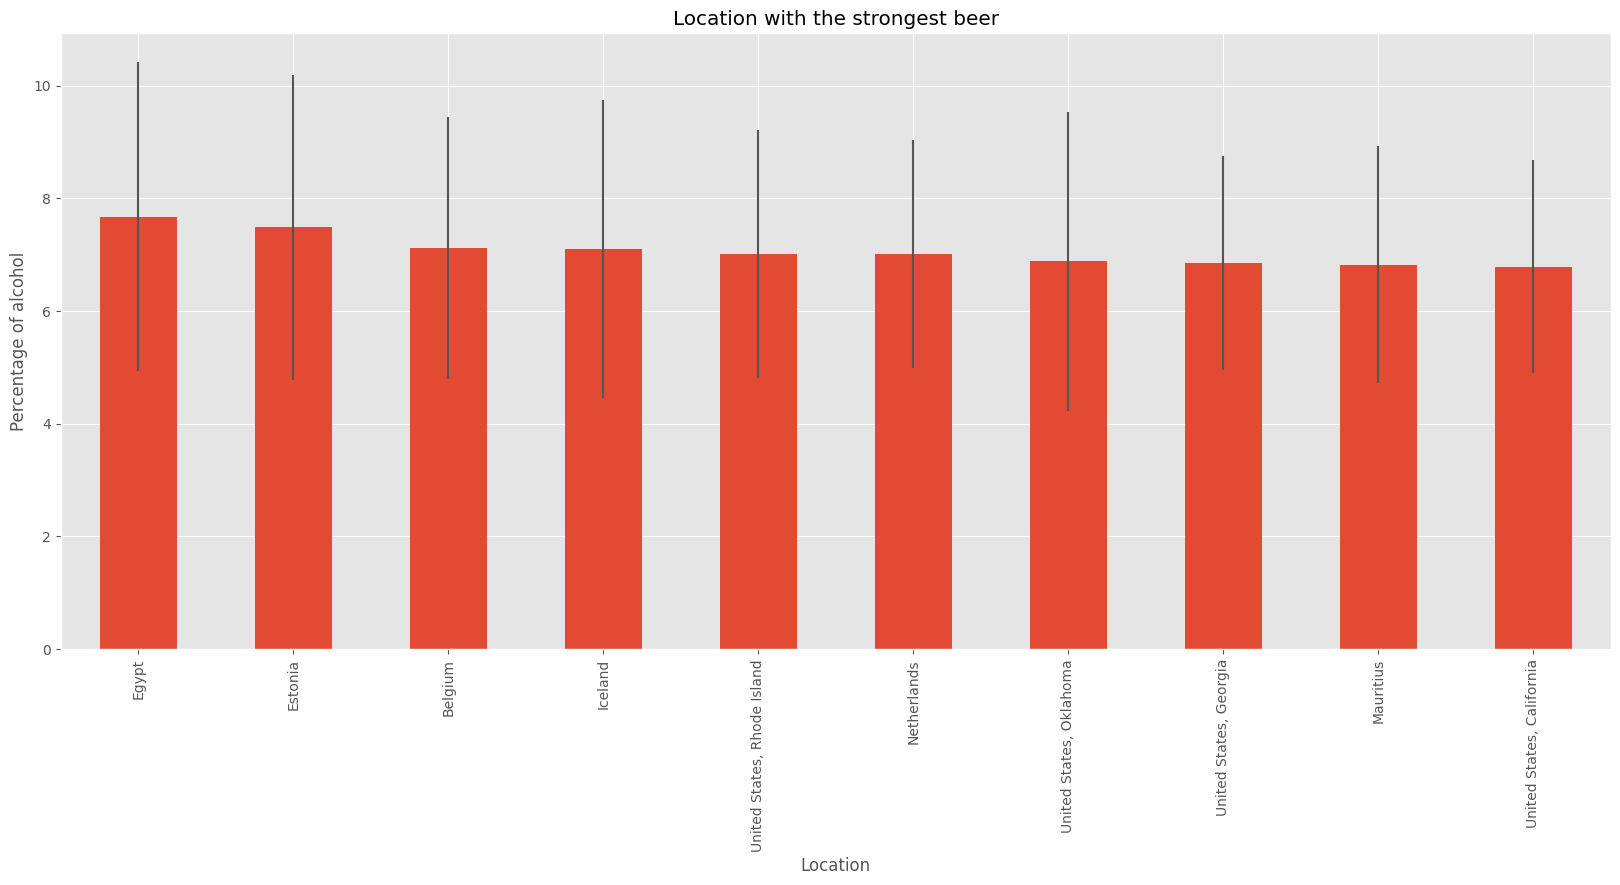

In [ ]:
#Sort the dataframe by considering the 10 location with the strongest beer
avg_rating_location = df_beer_breweries_flt_abv.groupby('location').abv.describe()
avg_rating_location.sort_values(by='mean', ascending=False, inplace=True)
top_ten_abv_strong = avg_rating_location.head(10)
display(top_ten_abv_strong)


#Plot the result with standard deviation as error bar
pl = top_ten_abv_strong['mean'].plot(kind='bar', figsize=[20,8], rot=0, yerr=top_ten_abv_strong['std']) #mieux de faire avec CI ?????
pl.set_title('Location with the strongest beer')
pl.set_ylabel('Percentage of alcohol')
pl.set_xlabel('Location')
pl.set_xticklabels(top_ten_abv_strong.index, rotation=90)

#Keep a copy the ranking 
top_ten_abv_only_location = top_ten_abv_strong.index 
top_ten_abv_only_location

**BEER TRIPS RELATIVELY TO THE RATINGS**

In [ ]:
#Select only the beers with at least 5 ratings on each sites (RateBeer and Beer Advocate): 
df_beer_breweries_clean_5_plus = df_beer_breweries_clean[(df_beer_breweries_clean['nbr_ratings'] >=5) & (df_beer_breweries_clean['nbr_ratings.1'] >=5)]


(125, 30)


[Text(0, 0, 'Argentina'),
 Text(1, 0, 'Australia'),
 Text(2, 0, 'Austria'),
 Text(3, 0, 'Bahamas'),
 Text(4, 0, 'Belgium'),
 Text(5, 0, 'Brazil'),
 Text(6, 0, 'Bulgaria'),
 Text(7, 0, 'Cambodia'),
 Text(8, 0, 'Canada'),
 Text(9, 0, 'Cape Verde Islands'),
 Text(10, 0, 'Cayman Islands'),
 Text(11, 0, 'Chile'),
 Text(12, 0, 'China'),
 Text(13, 0, 'Colombia'),
 Text(14, 0, 'Costa Rica'),
 Text(15, 0, 'Croatia'),
 Text(16, 0, 'Cyprus'),
 Text(17, 0, 'Czech Republic'),
 Text(18, 0, 'Denmark'),
 Text(19, 0, 'England'),
 Text(20, 0, 'Eritrea'),
 Text(21, 0, 'Estonia'),
 Text(22, 0, 'Faroe Islands'),
 Text(23, 0, 'Finland'),
 Text(24, 0, 'France'),
 Text(25, 0, 'French Polynesia'),
 Text(26, 0, 'Germany'),
 Text(27, 0, 'Ghana'),
 Text(28, 0, 'Greece'),
 Text(29, 0, 'Guatemala'),
 Text(30, 0, 'Hong Kong'),
 Text(31, 0, 'Hungary'),
 Text(32, 0, 'Iceland'),
 Text(33, 0, 'India'),
 Text(34, 0, 'Ireland'),
 Text(35, 0, 'Israel'),
 Text(36, 0, 'Italy'),
 Text(37, 0, 'Japan'),
 Text(38, 0, 'Laos'),
 T

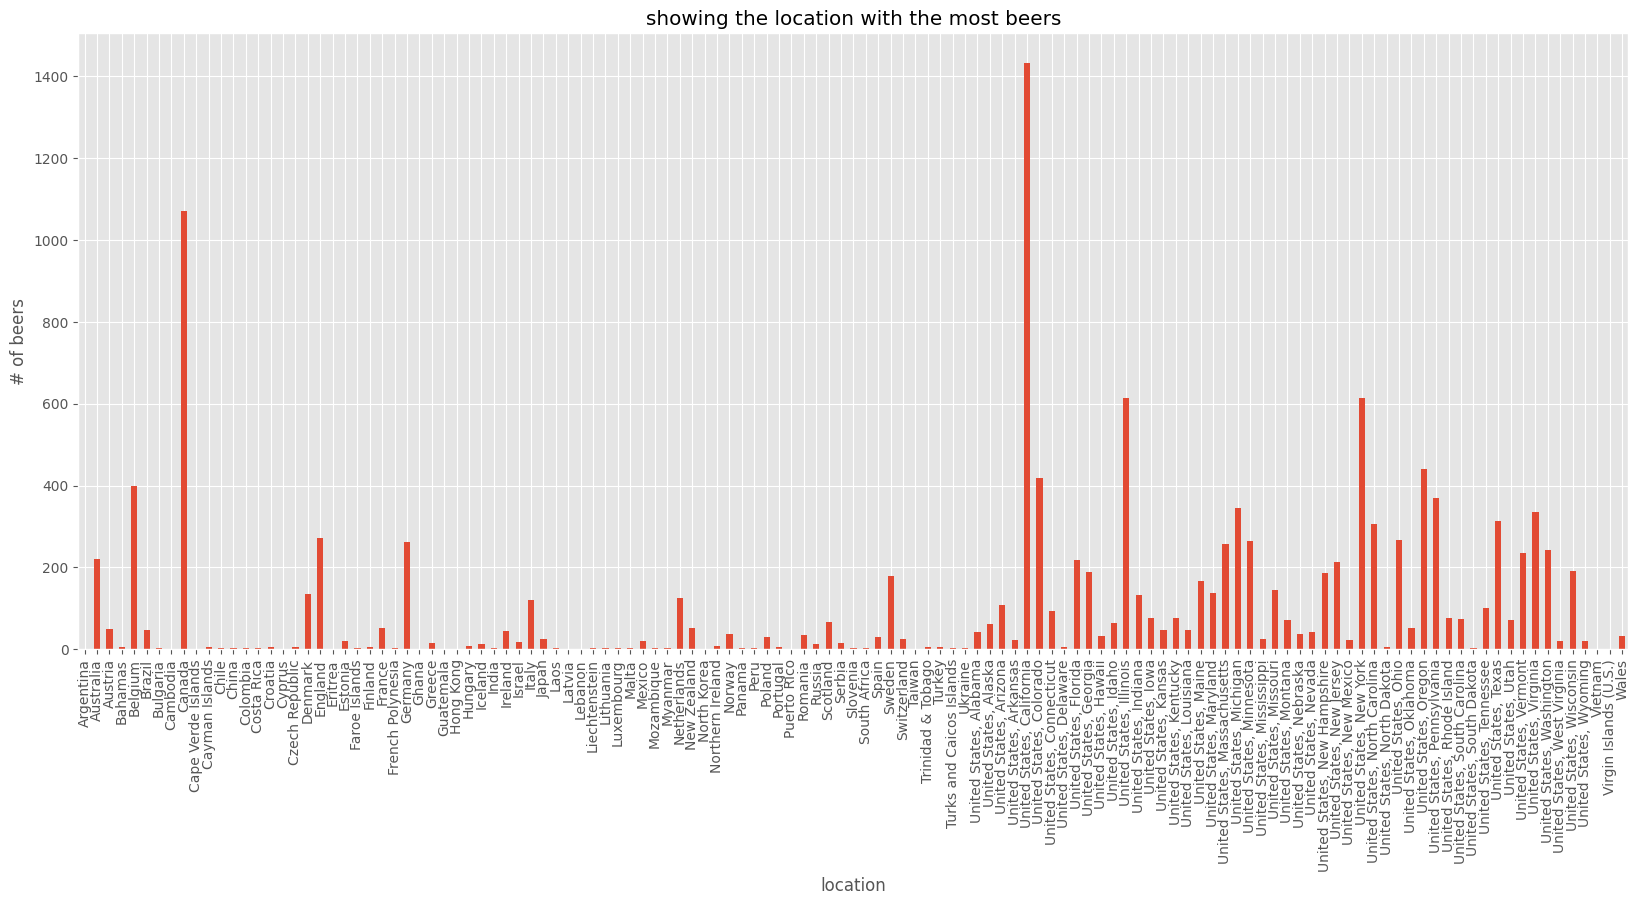

In [ ]:
#Grouped the beers by location and count the number of beers in each location
df_beer_breweries_clean_5_plus_4plot = df_beer_breweries_clean_5_plus.groupby(['location']).count()
print(np.shape(df_beer_breweries_clean_5_plus_4plot))

#Plot the location with the most beers with at least 5 ratings on each sites
pl = df_beer_breweries_clean_5_plus_4plot['beer_name'].plot(kind='bar', figsize=[20,8])
pl.set_title('showing the location with the most beers')
pl.set_ylabel('# of beers')
pl.set_xlabel('location')
pl.set_xticklabels(df_beer_breweries_clean_5_plus_4plot.index, rotation=90)


In [ ]:
#We can see on the previous graph that we would still have a lot of location to visit
#Drop the beers with no score in either sites
df_beer_breweries_clean_5_plus = df_beer_breweries_clean_5_plus.drop(df_beer_breweries_clean_5_plus[(df_beer_breweries_clean_5_plus['ba_score'].isna()) | (df_beer_breweries_clean_5_plus['overall_score'].isna())].index)

#Drop the location with less than 5 beers (to do a beer trip, we need to have different beer to drink!)
df_beer_breweries_flt = df_beer_breweries_clean_5_plus.groupby('location').filter(lambda x: len(x) >= 5)


In [ ]:
#We still have 78 destinations for our trip. It is a good number to start with! Now lets analysis the data relatively to some features
#Analyse the beers'average rating on the two website and plot the result
#New columns
df_beer_breweries_flt['average_rating'] = (df_beer_breweries_flt['ba_score'] + df_beer_breweries_flt['overall_score'])/2
df_beer_breweries_flt.groupby('location').average_rating.describe()



,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
Australia,105.0,68.876190,15.225671,38.5,58.500,66.00,84.500,94.0
Austria,29.0,69.206897,16.644131,43.5,53.500,66.00,86.000,93.0
Bahamas,5.0,46.000000,11.208256,37.0,41.000,42.50,44.000,65.5
Belgium,309.0,79.854369,14.198665,35.0,69.500,84.00,91.500,100.0
Brazil,14.0,80.357143,14.486637,44.5,74.625,87.50,90.875,92.0
...,...,...,...,...,...,...,...,...
"United States, Washington",138.0,75.365942,11.902821,45.0,66.000,77.25,85.375,100.0
"United States, West Virginia",13.0,69.961538,12.707382,54.0,57.500,69.00,81.500,89.0
"United States, Wisconsin",142.0,68.042254,16.366426,34.0,55.500,66.00,83.125,97.0


In [ ]:
df_beer_breweries_flt.groupby('location').average_rating.describe().head(50)


,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
Australia,105.0,68.876190,15.225671,38.5,58.500,66.00,84.500,94.0
Austria,29.0,69.206897,16.644131,43.5,53.500,66.00,86.000,93.0
Bahamas,5.0,46.000000,11.208256,37.0,41.000,42.50,44.000,65.5
Belgium,309.0,79.854369,14.198665,35.0,69.500,84.00,91.500,100.0
Brazil,14.0,80.357143,14.486637,44.5,74.625,87.50,90.875,92.0
Canada,628.0,72.938694,14.041087,33.5,62.500,73.50,86.000,97.0
Denmark,86.0,87.703488,6.037811,56.0,86.500,89.50,91.000,95.0
England,131.0,80.858779,12.412350,45.0,72.000,86.00,90.500,96.5
Estonia,11.0,90.409091,3.292554,81.5,89.750,91.00,92.250,93.5


,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
Estonia,11.0,90.409091,3.292554,81.5,89.750,91.00,92.25,93.5
Denmark,86.0,87.703488,6.037811,56.0,86.500,89.50,91.00,95.0
"United States, Maine",128.0,86.285156,11.237536,48.0,83.500,89.75,94.00,100.0
"United States, Vermont",152.0,85.180921,13.134625,43.5,77.375,90.50,95.50,100.0
Poland,6.0,84.583333,14.776389,54.5,89.125,91.00,91.00,91.5
"United States, California",805.0,84.091304,10.866618,37.0,79.000,87.50,92.00,100.0
New Zealand,23.0,82.782609,10.216771,60.0,75.500,88.00,91.25,92.5
"United States, Illinois",322.0,81.920807,10.062458,52.0,76.000,84.75,89.50,98.0
"United States, Georgia",131.0,81.812977,9.036536,59.5,76.000,83.50,89.50,96.0


Index(['Estonia', 'Denmark', 'United States, Maine', 'United States, Vermont',
       'Poland', 'United States, California', 'New Zealand',
       'United States, Illinois', 'United States, Georgia',
       'United States, Alaska'],
      dtype='object', name='location')

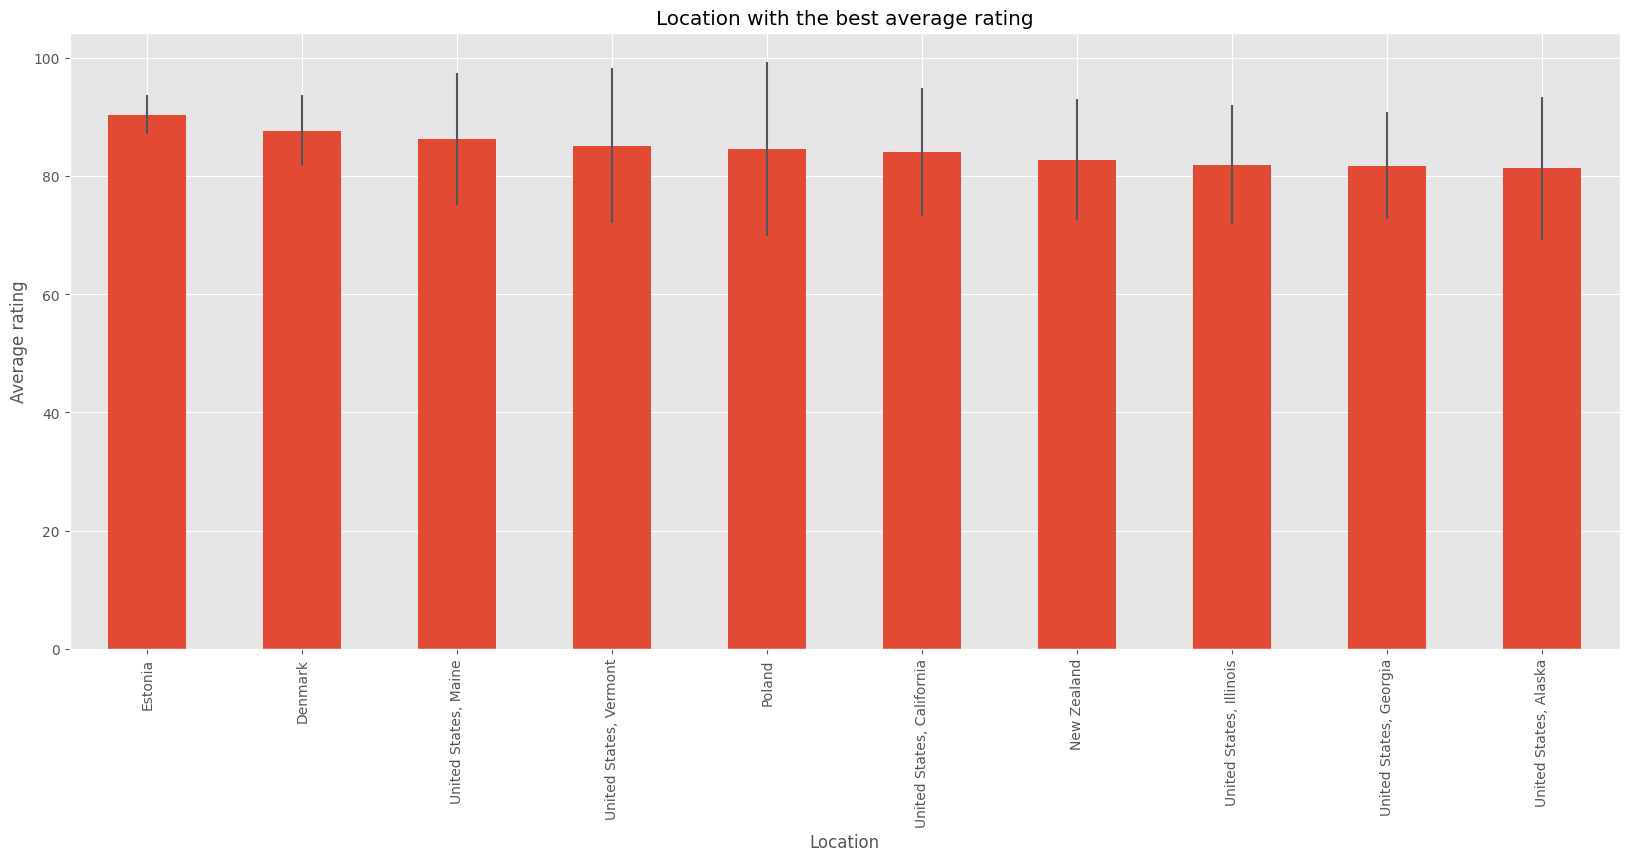

In [ ]:
#Sort the dataframe by considering the 10 location with the best average rating
avg_rating_location = df_beer_breweries_flt.groupby('location').average_rating.describe()
avg_rating_location.sort_values(by='mean', ascending=False, inplace=True)
top_ten_best = avg_rating_location.head(10)
display(top_ten_best)


#Plot the result with stndard deviation as error bar
pl = top_ten_best['mean'].plot(kind='bar', figsize=[20,8], rot=0, yerr=top_ten_best['std'])
pl.set_title('Location with the best average rating')
pl.set_ylabel('Average rating')
pl.set_xlabel('Location')
pl.set_xticklabels(top_ten_best.index, rotation=90)

#Keep a copy the ranking 
top_ten_best_only_location = top_ten_best.index 
top_ten_best_only_location


,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
Bahamas,5.0,46.000000,11.208256,37.0,41.000,42.50,44.000,65.5
Trinidad & Tobago,5.0,48.500000,23.590252,34.5,37.500,39.50,40.500,90.5
Spain,13.0,54.730769,15.025832,38.0,42.000,49.00,65.500,82.5
Greece,5.0,55.500000,12.830627,41.0,42.000,63.50,64.500,66.5
"United States, Delaware",5.0,61.600000,12.506998,47.5,55.000,56.00,73.000,76.5
Mexico,11.0,62.545455,10.722534,45.5,57.000,64.50,65.000,88.0
Japan,13.0,64.076923,17.267318,43.0,50.000,59.00,81.500,91.0
"United States, Arkansas",12.0,65.833333,10.025724,44.5,62.500,64.75,71.625,84.0
Germany,144.0,67.020833,14.000609,38.0,56.500,64.75,78.500,97.0


Index(['Bahamas', 'Trinidad & Tobago', 'Spain', 'Greece',
       'United States, Delaware', 'Mexico', 'Japan', 'United States, Arkansas',
       'Germany', 'United States, Nevada'],
      dtype='object', name='location')

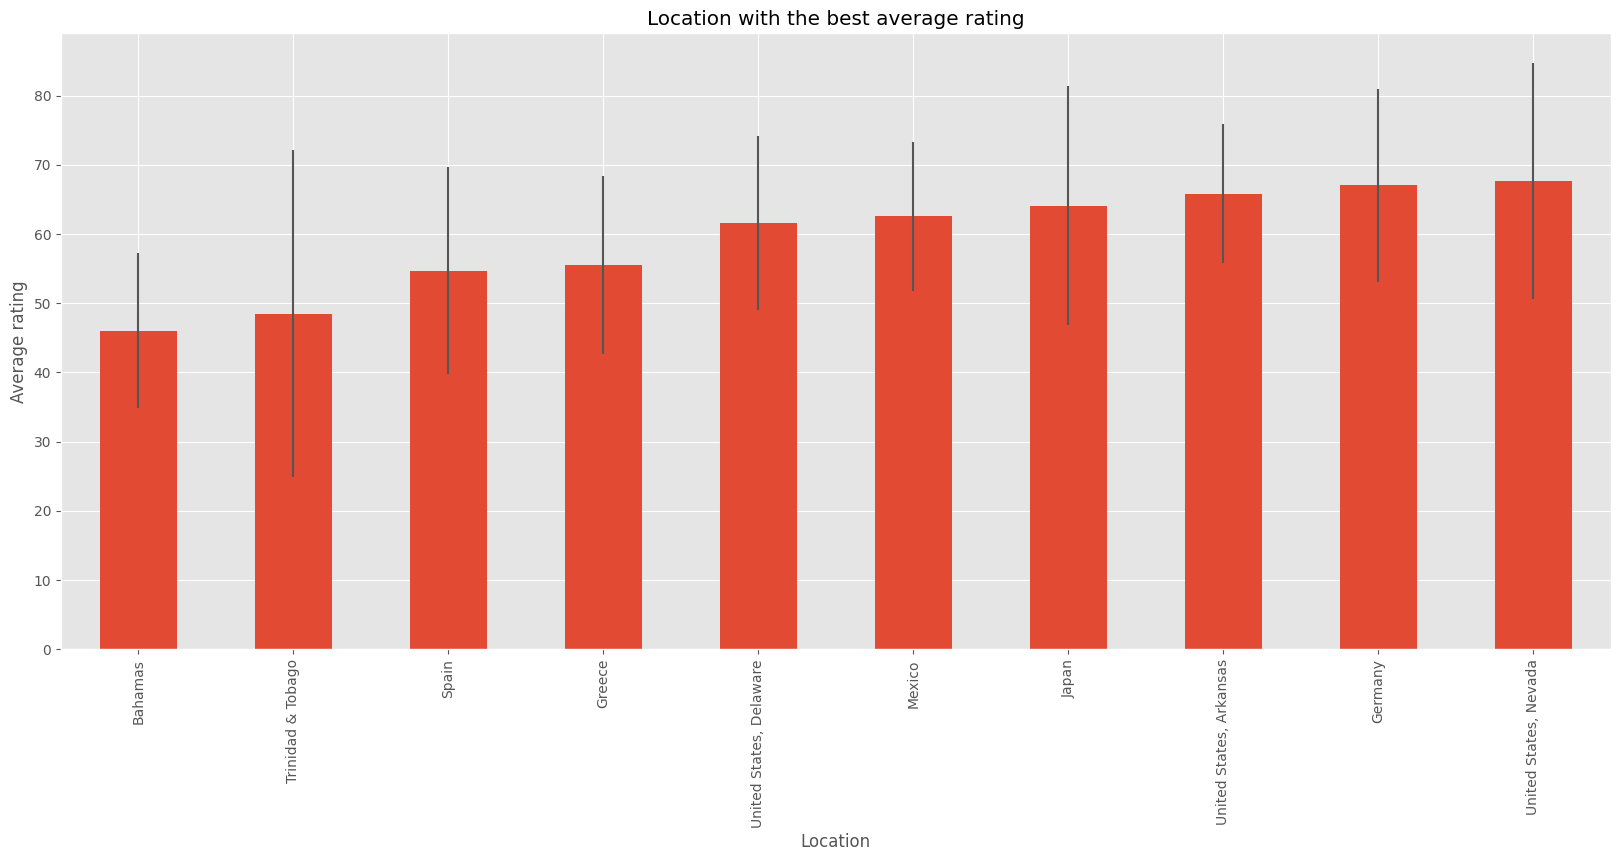

In [ ]:
#Sorted the location considering the 10 location with the worst average rating and plot the result
avg_rating_location = df_beer_breweries_flt.groupby('location').average_rating.describe()
avg_rating_location.sort_values(by='mean', ascending=True, inplace=True)
top_ten_worst = avg_rating_location.head(10)
display(top_ten_worst)


#Plot the result with stndard deviation as error bar
pl = top_ten_worst['mean'].plot(kind='bar', figsize=[20,8], rot=0, yerr=top_ten_worst['std'])
pl.set_title('Location with the best average rating')
pl.set_ylabel('Average rating')
pl.set_xlabel('Location')
pl.set_xticklabels(top_ten_worst.index, rotation=90)

#Keep a copy the ranking 
top_ten_worst_only_location = top_ten_worst.index 
top_ten_worst_only_location

**BEER TRIP RELATIVELY TO THE NUMBER OF USERS**

In [ ]:
#To determine the locations where the population is the most passionate by beer. 
#We thought about computing the amount of reviewers per location relatively to the population of the location.

df_users_approx

,joined,location,nbr_ratings,nbr_reviews,user_id,user_name,user_name_lower,joined.1,location.1,nbr_ratings.1,user_id.1,user_name.1,user_name_lower.1,sim
0,1.483009e+09,Spain,3,0,magicuenca.1185749,MAGICuenca,magicuenca,1.484046e+09,Spain,89,442761,MAGICuenca91,magicuenca91,0.904534
1,1.220868e+09,Germany,6,6,erzengel.248045,Erzengel,erzengel,1.224324e+09,Germany,8781,83106,Erzengel,erzengel,1.000000
2,1.348394e+09,"United States, Virginia",1,1,gendv138.695700,GenDV138,gendv138,1.385723e+09,"United States, Virginia",6240,290599,GenDV138,gendv138,1.000000
3,1.207303e+09,"United States, Washington",3,3,nimbleprop.208928,nimbleprop,nimbleprop,1.150798e+09,"United States, Washington",7452,38859,nimbleprop,nimbleprop,1.000000
4,1.322737e+09,Estonia,11,0,visionthing.639993,visionthing,visionthing,1.242986e+09,Estonia,5462,91324,visionthing,visionthing,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3336,1.095847e+09,"United States, Michigan",587,587,ypsifly.8833,ypsifly,ypsifly,1.139569e+09,"United States, Michigan",1,33393,ypsifly,ypsifly,1.000000
3337,1.047121e+09,"United States, Texas",1379,1379,hardtarget.1712,HardTarget,hardtarget,1.095934e+09,"United States, Texas",1,15553,HardTarget,hardtarget,1.000000
3338,1.106478e+09,"United States, Delaware",1,1,deadterry.13629,DeadTerry,deadterry,1.014462e+09,"United States, Delaware",2,3514,DeadTerry99,deadterry99,0.894427
3339,1.416740e+09,Vietnam,176,24,nelsonsaigon.897449,nelsonsaigon,nelsonsaigon,1.406369e+09,Vietnam,1,327965,nelsonsaigon,nelsonsaigon,1.000000


**ILLUSTRATION OF THE TRIPS ON A MAP**

In [167]:
%pip install plotly

  Obtaining dependency information for plotly from https://files.pythonhosted.org/packages/a8/07/72953cf70e3bd3a24cbc3e743e6f8539abe6e3e6d83c3c0c83426eaffd39/plotly-5.18.0-py3-none-any.whl.metadata
  Obtaining dependency information for tenacity>=6.2.0 from https://files.pythonhosted.org/packages/f4/f1/990741d5bb2487d529d20a433210ffa136a367751e454214013b441c4575/tenacity-8.2.3-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
   ---------------------------------------- 0.2/15.6 MB 5.9 MB/s eta 0:00:03
   - -------------------------------------- 0.5/15.6 MB 6.4 MB/s eta 0:00:03
   -- ------------------------------------- 0.9/15.6 MB 7.1 MB/s eta 0:00:03
   --- ------------------------------------ 1.2/15.6 MB 6.8 MB/s eta 0:00:03
   --- ------------------------------------ 1.3/15.6 MB 7.0 MB/s eta 0:00:03
   ---- ----------------------------------- 1.8/15.6 MB 6.7 MB/s eta 0:00:03
   ----- ---------------------------------- 2.2/15.6 MB 7.0 MB


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [168]:
import plotly.graph_objects as go
import plotly.express as px
import json

%matplotlib inline

In [ ]:
#new.location.apply(lambda x: x.split(', '))
tmp = df_beer_breweries_clean.groupby('location').size().reset_index(name='count')
new = df_beer_breweries_clean.groupby('location').avg.mean().reset_index().dropna()
#remove everything after the string United States, in the location coumn



#add the count column to the new df
new = pd.merge(new, tmp, on='location', how='left')
new = new[new['count'] > 5]

#sort new df by avg
new = new.sort_values(by=['avg'], ascending=False)

display(new, tmp)

In [ ]:
countries = json.load(open('../beer_data/custom.geo.json', 'r'))
countries_id_map = {}

for feature in countries['features']:
    feature['id'] = feature['properties']['name_long']
    countries_id_map[feature['properties']['name_long']] = feature['id']

new['id'] = new['location'].apply(lambda x: countries_id_map[x])

In [ ]:
fig =  px.choropleth(new, 
                     geojson=countries, # geojson file to use
                     locations="location", # which column to use to set the color of markers
                     color = 'avg', # color of markers can be a single color value or an iterable
                     projection="orthographic",
                     )


fig.show()

### Calculation of the overall ranking: 

In [ ]:
#Compute the overall ranking based on the previous rankings (assume 10 rankings)
def overall_ranking(w1, w2, w3, w4, w5, w6, w7, w8, w9, w10) :
    '''
    Plot the overall ranking based on the previous rankings and their respective weights, given by the customer. 
    The weights must be between 0 and 1 and must sum to 1.

    Args :
        w1 : weight of the ranking 1
        w2 : weight of the ranking 2
        w3 : weight of the ranking 3
        w4 : weight of the ranking 4
        w5 : weight of the ranking 5
        w6 : weight of the ranking 6
        w7 : weight of the ranking 7
        w8 : weight of the ranking 8
        w9 : weight of the ranking 9
        w10 : weight of the ranking 10 
    '''
    # Add the point for each ranking 
    df_density_top10 = pd.DataFrame({'location': top_ten_density_location, 'score' : [10,9,8,7,6,5,4,3,2,1]})
    df_bestratings_top10 = pd.DataFrame({'location': top_ten_best_only_location, 'score' : [10,9,8,7,6,5,4,3,2,1]})
    df_worstratings_top10 = pd.DataFrame({'location': top_ten_worst_only_location, 'score' : [1,2,3,4,5,6,7,8,9,10]})  
    df_strongest_abv_top10 = pd.DataFrame({'location': top_ten_abv_only_location, 'score' : [10,9,8,7,6,5,4,3,2,1]})
    df_softest_abv_top10 = pd.DataFrame({'location': top_ten_abv_only_location, 'score' : [10,9,8,7,6,5,4,3,2,1]})

    # Apply the weights to the score
    df_density_top10['score'] = df_density_top10['score'] * w1
    df_bestratings_top10['score'] = df_bestratings_top10['score'] * w2
    df_worstratings_top10['score'] = df_worstratings_top10['score'] * w3
    df_strongest_abv_top10['score'] = df_strongest_abv_top10['score'] * w4
    df_softest_abv_top10['score'] = df_softest_abv_top10['score'] * w5

    # Merge all the dataframes
    df_overall = pd.merge(df_density_top10, df_bestratings_top10, on='location', how='outer')
    df_overall = pd.merge(df_overall, df_worstratings_top10, on='location', how='outer')
    df_overall = pd.merge(df_overall, df_strongest_abv_top10, on='location', how='outer')
    df_overall = pd.merge(df_overall, df_softest_abv_top10, on='location', how='outer')



### TO DO : change the number in Args by the name of the ranking (ex : % of alcohol, density of breweries, etc)


### Find additional useful travel informations: 